### Segundo Desafio da 3º Imerssão de Dados Alura

Para esse desafio estou utilizando o dataset *dados_experimentos.zip* disponbilizado durante a imersão de dados. O dataset contém dados de experimentos biogenéticos que foi proposto pela [Vanessa Leiko](https://www.linkedin.com/in/vanessa-leiko-oikawa-cardoso/) como material de apoio para essa imersão.

Cada linha deste dataset contém os experimentos realizados, onde pode ser observado na coluna **Tratamento** que alguns dos experimentos houve a exposição a droga e por determinado tempo conforme descreve a coluna **tempo**.

Durante o experimentos houve diferentes dosagens e utilizado várias amostras de drogas conforme nota-se na coluna **composto**.

Cada linha representa uma cultura de célula que foi exposta ao experimento, sendo submetido há algum tipo de droga para tal dosagem.


Criado por Leniel dos Santos
Adicione no [linkedin](https://www.linkedin.com/in/leniel-dos-santos-7813a924/)

In [3]:
# carregar as bibliotecas de sempre
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Vamos carregar o dadaset de experimentos
df = pd.read_csv('dados_experimentos.zip', compression='zip')

Queremos melhorar a visualização do nosso histograma de compostos e, como existem mais de 3.000 variações na nossa base de dados, decidimos elencar os 5 compostos que mais aparecem. Para isso, vamos usar a função value_counts (função presente na biblioteca Pandas e que conta a ocorrência dos diferentes valores) e, como queremos saber somente os 5 elementos mais frequentes, também declaramos o index[0:5]. Essa parte final, faz com que o value_countsse atenha à contagem dos maiores valores e apresente como resultado apenas o index do intervalo [0, 5[, ou seja, o nome dos 5 maiores valores.

In [5]:
df.rename(columns={'droga': 'composto'}, inplace=True)

In [6]:
cod_compostos = df['composto'].value_counts().index[0:5]

Exitem algumas maneiras de filtrar uma base de dados e optamos em usar a função query do Pandas e, somente a título de curiosidade, essa função é bastante análoga ao SQL (linguagem de programação para bancos de dados). A estrutura dela é bastante simplificada, precisamos apenas definir o dataframe, chamar a função e passar como parâmetro a condição que deve ser filtrada no nosso conjunto de dados.

Nesta parte do projeto, queremos realizar um filtro em nossos dados, selecionando apenas as linhas nas quais o composto esteja dentro da nossa lista cod_composto (lista que representa os 5 compostos mais testados no experimento) e vamos utilizar o método query para resolver este problema.

Como parâmetro da função, passamos uma string contendo a lógica para realização da seleção dos dados. O que queremos é o seguinte: o queryprecisa retornar para nós todas as linhas contendo os 5 compostos mais utilizados. Logo, a string necessária para isso é: composto in @cod_compostos.

Usamos composto porque essa é a coluna a ser verificada no dataframe e cod_compostos por ser a lista com os top 5 compostos, o detalhe aqui é que o @ é necessário para informar o query que cod_composto é uma variável que já foi definida fora da função.

In [7]:
df.query('composto in @cod_compostos')

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,...,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,...,1.2470,0.9569,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082
23802,id_fff3976bd,com_droga,24,D1,87d714366,3.2890,2.1270,0.9770,2.0490,2.3170,...,-8.6300,-8.1490,-6.2900,-8.0970,-8.7330,-2.3780,-8.4480,-4.4550,-5.7930,-3.7000
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,...,0.2865,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808


Agora que vimos que a nossa filtragem funcionou e que temos como retorno uma base de dados com 3.235 linhas, podemos usar a função querycomo parâmetro para o countplot, o nosso gráfico de barras. O countplot é um gráfico pré-programado da biblioteca Seaborne, por isso, precisaremos fazer a importação padrão da mesma (import seaborn as sns). Adicionalmente, aqui no Google Colaboratory, para que possamos enxergar o gráfico com os padrões de configuração da biblioteca, precisamos rodar sns.set(). Além disso, para refinar a apresentação do gráfico, podemos utilizar algumas funcionalidades da biblioteca Matplotlib (fazendo, primeiramente, sua importação - import matplotlib.pyplt as plt). Também estamos definindo o tamanho do gráfico através da função figure e seu parâmetro figsize=(x, y)) e o título através do set_title('Título'). Como comentado na aula, usualmente, armazenamos o nosso gráfico em uma variável ax e então, definimos as demais configurações (por exemplo, ax.set_title('Título'). E, finalmente, para visualizar o gráfico de barras, usamos o plt.show().

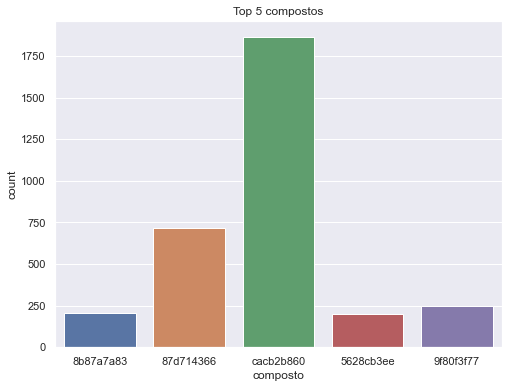

In [8]:
sns.set()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='composto', data=df.query('composto in @cod_compostos'))
ax.set_title('Top 5 compostos')
plt.show()

Até o momento analisamos os dados de tempo, dose, compostos e afins. Entretanto, não analisamos os dados de expressões gênicas (G's) e viabilidade celular (C's). Será que podemos criar um gráfico de barras para esses dados? Vamos pensar que a nossa base de dados apresenta mais de 3.000 compostos. Mas quantos desses compostos aparecem na coluna g-0? Para responder essa questão, vamos usar a função unique() do Pandas que conta os valores únicos presentes na coluna em questão. Como resposta padrão, o retorno será uma lista com arrays (os nomes dos compostos) mas, nosso objetivo é saber o tamanho dessa lista e, por isso, usamos o len, pois assim, ele contará o tamanho desta lista de arrays.

### Desafio 01: Ordenar o gráfico countplot



In [10]:
order_list = df.query('composto in @cod_compostos')

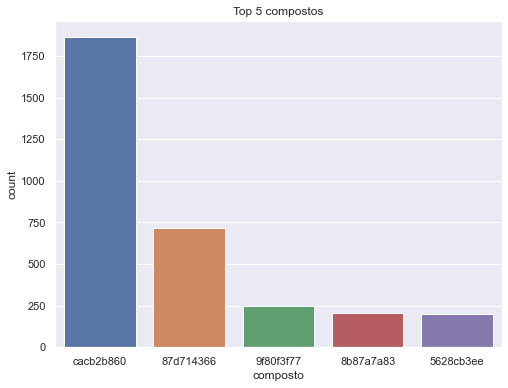

In [11]:
sns.set()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='composto', 
                    data=order_list, 
                    order=order_list['composto'].value_counts().index)
ax.set_title('Top 5 compostos')
plt.show()

### Desafio 02: Melhorar a visualização alterando tamanho da fonte...



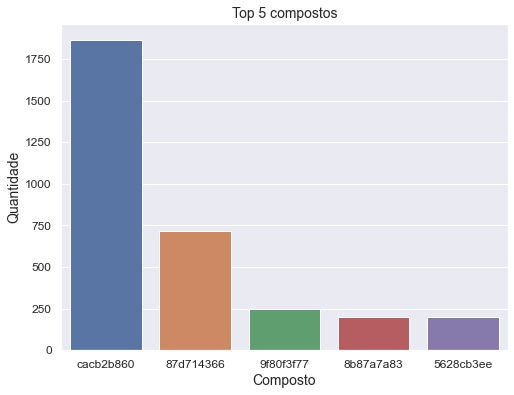

In [18]:
sns.set()
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='composto', 
                    data=order_list, 
                    order=order_list['composto'].value_counts().index)
ax.set_title('Top 5 compostos')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Composto')
plt.show()

### Desafio 03: Plotar os histogramas com seaborn



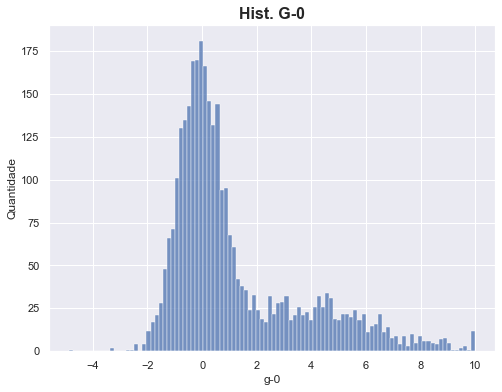

In [94]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=order_list, x='g-0', bins=100)
ax.set_title('Hist. G-0', fontdict={'fontsize':16, 'fontweight':700})
plt.ylabel('Quantidade')
plt.show()

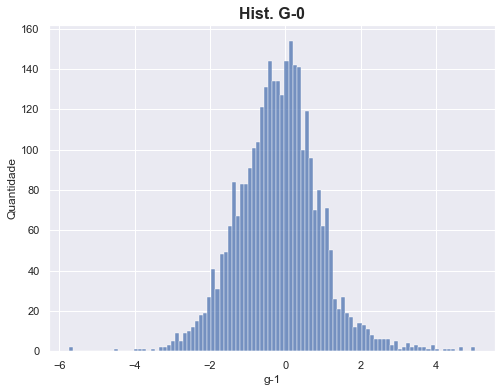

In [95]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=order_list, x='g-1', bins=100)
ax.set_title('Hist. G-1', fontdict={'fontsize':16, 'fontweight':700})
plt.ylabel('Quantidade')
plt.show()

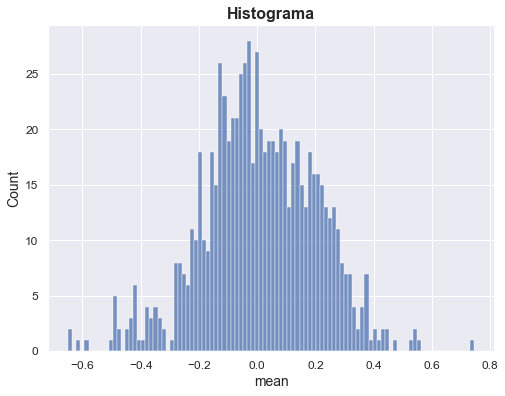

In [22]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df.loc[:, 'g-0':'g-771'].describe().T, x='mean', bins=100)
ax.set_title('Histograma', fontdict={'fontsize':16, 'fontweight':700})
plt.show()

### Desafio 04: Estudar sobre as estatíticas retornadas no .describe()



In [82]:
df.loc[:, 'g-0':'g-771'].describe()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,...,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,...,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,...,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,...,-0.433875,-0.502250,-0.537075,-0.508775,-0.606175,-0.506200,-0.353100,-0.544600,-0.554400,-0.523800
50%,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,0.160450,...,0.059600,-0.005900,-0.013600,-0.027700,-0.011850,0.009900,0.005400,0.000600,0.028700,-0.006500
75%,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,0.697775,...,0.648500,0.492150,0.522500,0.457000,0.483000,0.511175,0.409075,0.498500,0.496400,0.536950
max,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,6.433000,...,10.000000,9.552000,10.000000,8.346000,5.444000,6.317000,10.000000,5.911000,10.000000,10.000000


### Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.



Para refletirmos sobre a visualização de gráficos utilizando a biblioteca [seaborn](https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) vamos fazer uma platagem simples de um gráfico.

Não precisamos muito para sabermos que as informações do gráfico, ou da forma que apresentamos fica meio. Notem que no eixo Y se refere ao count. Afinal o que é count? Que informação queremos transmitir no eixo Y *(count)*?

No eixo X esta nomeado como *composto*, outra informação vaga que não descreve com clareza o que tipo de informação queremos transmitir.

Também fácil de notar que não temos uma ordenação das informações, não é mesmo? Se o objetivo do gráfico e transmitir uma informação quantitativa, ou seja, a concentração de tal elemento/feature dentro da população precisamos melhorar essa visualização.

Bom, feito um breve resumo sobre minha reflexão em relação a visualização dos dados plotados no gráfico abaixo, que tal partirmos para prática e melhorar a visualização deste gráfico?

Aproveite e faça a leitura deste artigo no site da [ALURA](https://www.alura.com.br/artigos/visualizando-informacoes-com-um-grafico) sobre este tema.



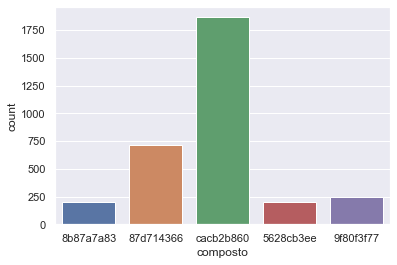

In [47]:
ax = sns.countplot(x='composto', data=order_list)
plt.show()

Acho que as primeiras coisas que devemos fazer é melhorar o tamanho da fonte e do próprio gráfico.

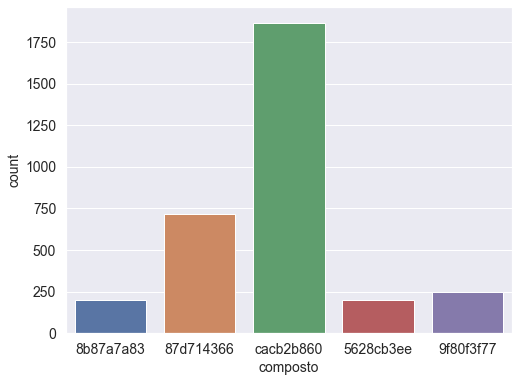

In [49]:
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='composto', data=order_list)
plt.show()

Agora notem que temos um gráfico mais visível e fácil de enxergar.

Quando batemos o olho a primeira coisa que chama nossa atenção é o exito X, a impressão é um embaralhado de informação que nos confunde, não é mesmo?

Além do eixto Y com a palavra count... que é isso :smiley: 

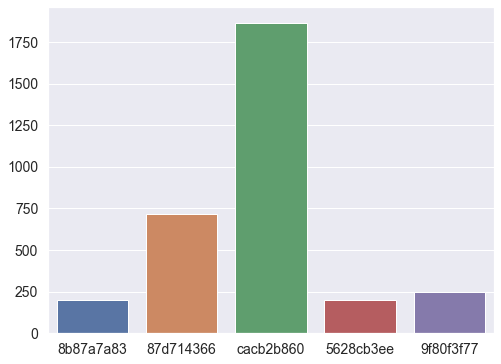

In [52]:
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='composto', data=order_list)

ax.set_ylabel('')
ax.set_xlabel('')

plt.show()

Agora ficou um pouco mais limpo o gráfico, mas por outro lado ficou complicado de entender o que é o eixo X, e não temos nada que nos esclareça que tipo de informação o gráfico quer transmitir.

Poderíamos incluir um título mais intuitivo para a informação que pretendemos transmitir com o gráfico. Além de ordenar o gráfico considerando que queremos apresentar uma informação quantitativa: quantos experimentos ocorreram com cada um dos compostos.


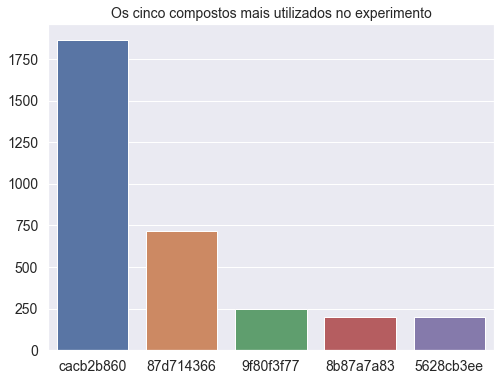

In [53]:
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='composto', data=order_list, order=order_list['composto'].value_counts().index)

ax.set_title('Os cinco compostos mais utilizados no experimento')
ax.set_ylabel('')
ax.set_xlabel('')

plt.show()

Agora conseguimos melhorar bem a visualização do gráfico. Poderíamos melhorar ainda mais este gráfico mas como estou sem tempo neste momento, vou parar por aqui. Quem sabe eu volte com uma atualização desse projeto mais para frente.

### Desafio 06: Fazer outras análises com o boxplot e até com o histograma.



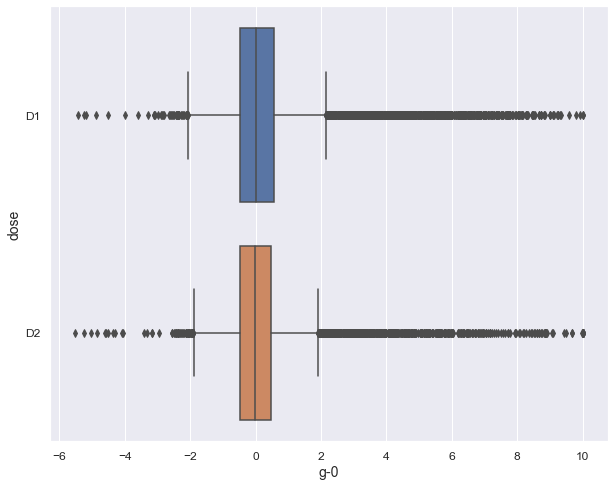

In [27]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='g-0', y='dose', data=df)

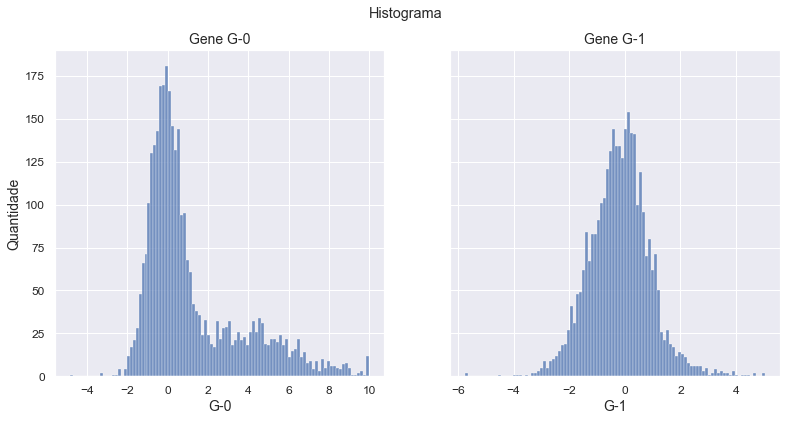

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(13, 6), sharey=True)
fig.suptitle('Histograma')

sns.histplot(ax=ax[0], data=order_list, x='g-0', bins=100)
ax[0].set_title('Gene G-0')
ax[0].set_xlabel('G-0')
ax[0].set_ylabel('Quantidade')

sns.histplot(ax=ax[1], data=order_list, x='g-1', bins=100)
ax[1].set_title('Gene G-1')
ax[1].set_xlabel('G-1')

plt.show()

### Desafio 07: Resumo do que você aprendeu com os dados

O que podemos notar a partir do histógrama é que os genes possuem uma distribuição normal simétrica e no caso do gene zero (g-0) a distribuição é assimétrica ou seja indica uma grande variação entre os dados.